In [1]:
import numpy as np
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
sys.path.append("/data1/sascha/")
import lob_bench.eval as eval
import lob.validation_helpers as valh
import lob.inference_no_errcorr as inference

/tmp/ipykernel_1029952/1628626277.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
sys.path

['/data1/sascha/LOBS5',
 '/data1/sascha/AlphaTrade',
 '/home/sascha/miniconda3/envs/alphatrade_new/lib/python310.zip',
 '/home/sascha/miniconda3/envs/alphatrade_new/lib/python3.10',
 '/home/sascha/miniconda3/envs/alphatrade_new/lib/python3.10/lib-dynload',
 '',
 '/home/sascha/miniconda3/envs/alphatrade_new/lib/python3.10/site-packages',
 '/data1/sascha/',
 '/data1/sascha/LOBS5/AlphaTrade']

# Processed input data

In [4]:
msg_files = sorted(glob("/data1/sascha/data/GOOG2017to2019/" + '*message*.npy'))
book_files = sorted(glob("/data1/sascha/data/GOOG2017to2019/" + '*orderbook*.npy'))
print(len(msg_files))
max(1, int(len(msg_files) * 0.1))

743


74

In [5]:
day=0
m_lob=inference.msg_to_lobster_format(np.load(msg_files[day]))
b_lob=inference.book_to_lobster_format(np.load(book_files[day])).drop(columns=0).rename(columns=lambda x:x-1)
b_lob_dropped=b_lob[1:].reset_index().drop(columns='index')
ask_depths, bid_depths=eval.limit_order_levels(m_lob,b_lob_dropped)

(array([15863.,  4062.,  3130.,  2867.,  2880.,  2824.,  2657.,  2432.,
         2174.,  1782.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

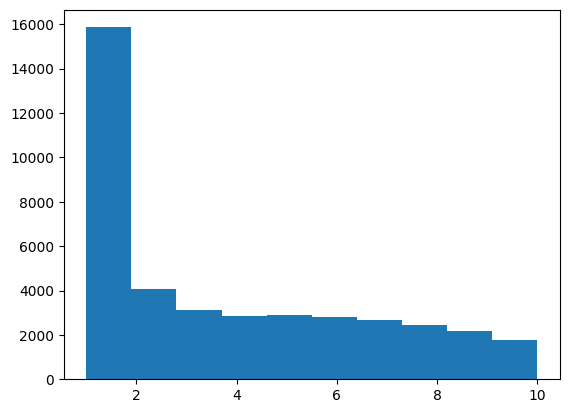

In [6]:
plt.hist(bid_depths)

In [7]:
m_lob

,time,event_type,order_id,size,price,direction
0,34200.068059063,2,9041290,60,7849400,-1
1,34200.070319410,1,9084118,6,7842800,-1
2,34200.071426840,1,9084462,6,7821500,-1
3,34200.072149156,3,9041282,6,7842700,-1
4,34200.072219142,3,9041290,6,7849400,-1
...,...,...,...,...,...,...
159481,57599.930569177,1,286029470,1,7860100,1
159482,57599.955218606,4,286011862,17,7861300,1
159483,57599.955990510,1,286030942,100,7861000,1
159484,57599.980005501,4,285962442,8,7861400,-1


In [8]:
b_lob_dropped.reset_index().drop(columns='index')

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,7800000,29,7797200,100,7804200,1,7796600,100,7806900,72,...,7782600,50,7860000,4,7780100,50,7874000,25,7780000,992
1,7800000,29,7797200,100,7804200,1,7796600,100,7806900,72,...,7782600,50,7850000,50,7780100,50,7860000,4,7780000,992
2,7800000,29,7797200,100,7804200,1,7796600,100,7806900,72,...,7782600,50,7849400,6,7780100,50,7850000,50,7780000,992
3,7800000,29,7797200,100,7804200,1,7796600,100,7806900,72,...,7782600,50,7850000,50,7780100,50,7860000,4,7780000,992
4,7800000,29,7797200,100,7804200,1,7796600,100,7806900,72,...,7782600,50,7860000,4,7780100,50,7874000,25,7780000,992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159481,7861400,2977,7861300,80,7861500,700,7860900,200,7862000,100,...,7858500,58,7863500,100,7857800,600,7863600,100,7857700,100
159482,7861400,2977,7861300,63,7861500,700,7860900,200,7862000,100,...,7858500,58,7863500,100,7857800,600,7863600,100,7857700,100
159483,7861400,2977,7861300,63,7861500,700,7861000,100,7862000,100,...,7858600,500,7863500,100,7858500,58,7863600,100,7857800,600
159484,7861400,2969,7861300,63,7861500,700,7861000,100,7862000,100,...,7858600,500,7863500,100,7858500,58,7863600,100,7857800,600


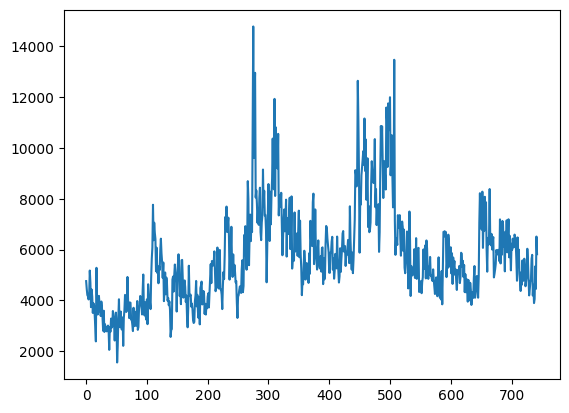

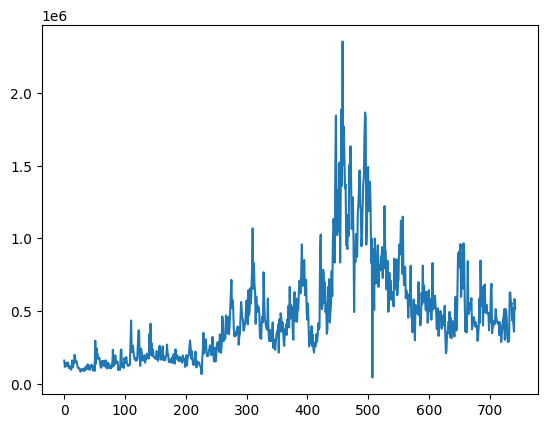

In [9]:
spreads,n_msg=[],[]

for bookfile,msgfile in zip(book_files,msg_files):
    b=np.load(bookfile)
    m=np.load(msgfile)
    b=b[1:]
    b=b[(m[:,8]>=34200) & (m[:,8]<57600) ]
    spread=(b[:,1]-b[:,3]).mean()
    spreads.append(spread)
    if spread > 1e6:
        print(b[:,1]-b[:,3])
        print(b[:,1],b[:,3])
        break
    n_msg.append(b.shape[0])

plt.plot(spreads)
plt.figure()
plt.plot(n_msg)

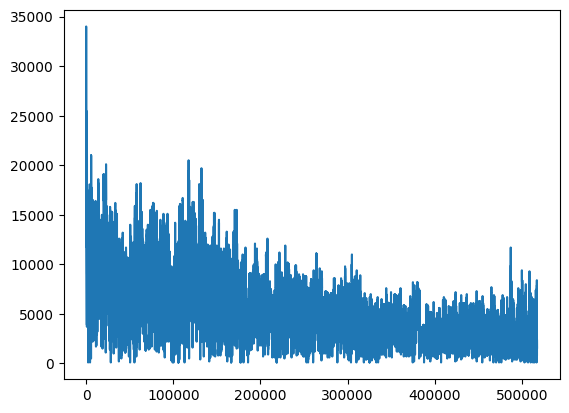

In [10]:
plt.plot((b[:,1]-b[:,3]))

# CSV Files - Gen or Raw

In [19]:
msg_files_gen = sorted(glob("/data1/sascha/data/GOOG/data_gen/" + '*message*.csv'))
book_files_gen = sorted(glob("/data1/sascha/data/GOOG/data_gen/" + '*orderbook*.csv'))
msg_files_real = sorted(glob("/data1/sascha/data/GOOG/data_real/" + '*message*.csv'))
book_files_real = sorted(glob("/data1/sascha/data/GOOG/data_real/" + '*orderbook*.csv'))
print(len(msg_files_real))
max(1, int(len(msg_files_real) * 0.1))

3136


313

In [25]:
errors=[]
i=0
for bfg,mfg,bfr,mfr, in zip(book_files_gen,msg_files_gen,book_files_real,msg_files_real):
    bg=pd.read_csv(bfg,header=None)
    mg=pd.read_csv(mfg,names=("time","event_type","order_id","quantity","price","side"))
    br=pd.read_csv(bfr,header=None)
    mr=pd.read_csv(mfr,names=("time","event_type","order_id","quantity","price","side"))
    err=(bg.diff(1)==0).all(axis=1).sum()
    errors.append(err)
    if err>5:
        break


In [26]:
print(np.mean(errors))

6.0


In [27]:
def reason_for_err(series):
    if ~((series.iloc[int(series['side']+1):80:4]==series['price']).any()) and series['event_type']==3:
        return "Price not there"

In [28]:
err=(bg.diff(1)==0).all(axis=1)
conc=pd.concat([bg.shift(-1),mg],axis=1)
error_df=conc[err]
# error_df['err_reason']=error_df.apply(reason_for_err,axis=1)
error_df

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,time,event_type,order_id,quantity,price,side
197,892900.0,56.0,892800.0,48.0,893000.0,21.0,892700.0,284.0,893200.0,1084.0,...,893900.0,450.0,891900.0,150.0,43107.240459,3,-2,93,893100,-1
242,892800.0,297.0,892600.0,209.0,892900.0,256.0,892500.0,541.0,893000.0,21.0,...,893800.0,900.0,891700.0,150.0,43107.247261,3,-2,95,892700,1
265,892800.0,240.0,892600.0,251.0,892900.0,134.0,892500.0,541.0,893000.0,343.0,...,893800.0,900.0,891700.0,150.0,43107.783231,3,-2,100,892700,1
344,892500.0,100.0,892400.0,1036.0,892600.0,100.0,892300.0,475.0,892700.0,350.0,...,893500.0,1150.0,891500.0,500.0,43107.792393,3,198,50,893400,-1
348,892500.0,100.0,892400.0,836.0,892600.0,100.0,892300.0,475.0,892700.0,350.0,...,893500.0,1150.0,891500.0,500.0,43107.792585,3,-2,100,893100,-1
377,892700.0,250.0,892400.0,886.0,892800.0,104.0,892300.0,425.0,892900.0,334.0,...,893700.0,200.0,891500.0,650.0,43107.795128,3,-2,100,892600,-1
424,892500.0,300.0,892400.0,536.0,892700.0,250.0,892300.0,425.0,892800.0,303.0,...,893600.0,1397.0,891500.0,801.0,43107.807695,3,-2,56,892600,-1
428,892500.0,300.0,892400.0,536.0,892600.0,100.0,892300.0,425.0,892700.0,250.0,...,893500.0,1200.0,891500.0,801.0,43107.815367,3,-2,100,893100,-1
468,892500.0,500.0,892400.0,536.0,892600.0,100.0,892300.0,303.0,892700.0,150.0,...,893400.0,684.0,891500.0,801.0,43107.870945,3,268,100,893400,-1


In [17]:
error_df[~(error_df.loc[:,'err_reason']=='Price not there')]

,0,1,2,3,4,5,6,7,8,9,...,77,78,79,time,event_type,order_id,quantity,price,side,err_reason
7,9147100.0,4.0,9146400.0,298.0,9149300.0,5.0,9143400.0,65.0,9149700.0,460.0,...,2.0,-1.0,0.0,57045.954978,3,-2,2,9152400,-1,None
37,9147100.0,3.0,9146400.0,298.0,9147300.0,5.0,9143400.0,65.0,9149200.0,100.0,...,105.0,-1.0,0.0,57062.179013,3,-2,25,9141300,1,None
56,9149200.0,100.0,9147600.0,1.0,9149300.0,5.0,9146400.0,298.0,9149700.0,460.0,...,25.0,-1.0,0.0,57063.633100,1,944,25,9155600,-1,None
72,9149200.0,100.0,9147600.0,1.0,9149300.0,5.0,9147300.0,5.0,9149700.0,460.0,...,105.0,9139200.0,25.0,57064.878874,1,928,9,9155600,-1,None
82,9149200.0,80.0,9148300.0,50.0,9149300.0,5.0,9147600.0,1.0,9149700.0,460.0,...,105.0,9140000.0,41.0,57064.882390,1,918,2,9157200,-1,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,9150000.0,417.0,9149900.0,33.0,9150200.0,5.0,9149800.0,121.0,9150300.0,1.0,...,135.0,9145600.0,5.0,57221.416490,1,35,31,9143900,1,None
967,9150000.0,417.0,9149900.0,33.0,9150200.0,5.0,9149800.0,121.0,9150300.0,1.0,...,135.0,9145600.0,5.0,57221.677312,1,33,31,9143900,1,None
968,9150000.0,417.0,9149900.0,33.0,9150200.0,5.0,9149800.0,121.0,9150300.0,1.0,...,135.0,9145600.0,5.0,57222.498590,1,32,69,9155900,-1,None
969,9150000.0,417.0,9149900.0,2.0,9150200.0,5.0,9149800.0,121.0,9150300.0,1.0,...,135.0,9145600.0,5.0,57223.320424,1,31,31,9143900,1,None


In [ ]:
m.loc[(err_idx) & (m.loc[:,"event_type"]==3)].loc[b_m.loc[(err_idx) & (m.loc[:,"event_type"]==3)].apply(in_book,axis=1)]

In [ ]:
b.loc[(err_idx) & (m.loc[:,"event_type"]==3)].loc[b_m.loc[(err_idx) & (m.loc[:,"event_type"]==3)].apply(in_book,axis=1)]

In [ ]:
plt.plot(b.loc[:,0])
plt.plot(b.loc[:,2])
# plt.plot((real_book.loc[:,0]+real_book.loc[:,2])/2)

In [ ]:
gen_msg.loc[((gen_book.diff(1)==0).all(axis=1)) & (gen_msg.loc[:,1]==3)]

In [ ]:
gen_book.loc[((gen_book.diff(1)==0).all(axis=1)) & (gen_msg.loc[:,1]==3)].loc[:,8:]